# Task 1 Titanic Classification

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Loading Dataset

In [63]:
df=pd.read_csv('Titanic-Dataset.csv')

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [65]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

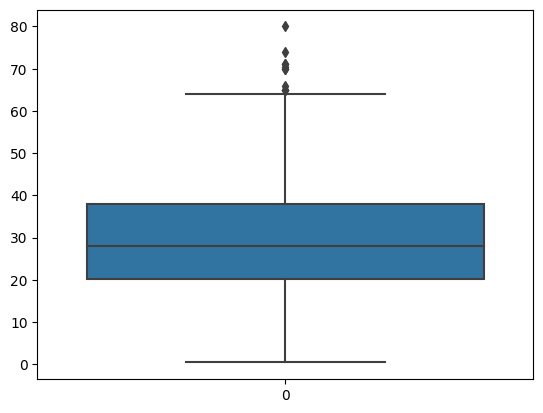

In [66]:
sns.boxplot(df['Age'])

In [67]:
#Using Median to handle outliers
df['Age'].fillna(abs(df['Age'].median()), inplace=True)

<Axes: >

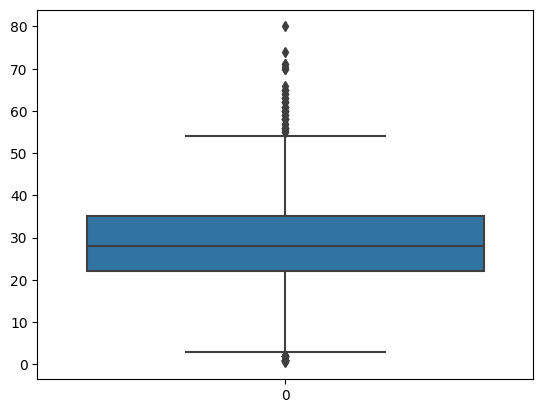

In [68]:
sns.boxplot(df['Age'])

In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

In [71]:
df['HasCabin'].value_counts()

HasCabin
0    687
1    204
Name: count, dtype: int64

In [72]:
df.drop('Cabin',axis=1,inplace=True)

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [74]:
df.drop('Name',axis=1,inplace=True)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0


In [76]:
value_Fill='S'
df['Embarked'].fillna(value_Fill,inplace=True)

In [77]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [78]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64

Handled all the missing Values Carefully.

In [79]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Convert Non-Numeric data to Numeric

In [80]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [81]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,0,0


In [82]:
df['Sex']=df['Sex'].map({'male': 0, 'female': 1})

In [83]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0


In [84]:
label_encoder_ticket = LabelEncoder()
df['Ticket']=label_encoder_ticket.fit_transform(df['Ticket'])

In [85]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,0,22.0,1,0,523,7.2500,0,0
1,2,1,1,1,38.0,1,0,596,71.2833,1,1
2,3,1,3,1,26.0,0,0,669,7.9250,0,0
3,4,1,1,1,35.0,1,0,49,53.1000,0,1
4,5,0,3,0,35.0,0,0,472,8.0500,0,0


# Train & Test Split

In [25]:
X=df.drop('Survived',axis=1)
X=df.drop('Ticket',axis=1)
y=df['Survived']

In [86]:
X.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,0
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0


In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [88]:
len(X_train),len(Y_train)

(712, 712)

In [89]:
len(Y_train),len(Y_test)

(712, 179)

# Model Selection (Random Forest Classifier)

In [90]:
model=RandomForestClassifier()

In [91]:
model.fit(X_train,Y_train);

### Model Evaluation

In [92]:
print(f'{model.score(X_test,Y_test)*100}%')

100.0%


In [93]:
y_pred=model.predict(X_test)

In [94]:
cm = confusion_matrix(Y_test, y_pred)

### Confusion Matrix

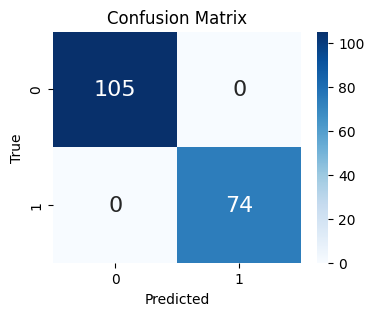

In [95]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Precision, Recall, F1_score

In [96]:
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

Precision: 100.0
Recall: 100.0
F1 Score: 100.0


# Model - 2 (Logistic Regression)

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model2= LogisticRegression(max_iter=1000)

In [99]:
model2.fit(X_train,Y_train);

In [100]:
model2.score(X_test,Y_test)

1.0

In [101]:
y_pred=model2.predict(X_test)

In [102]:
cm2 = confusion_matrix(Y_test, y_pred)

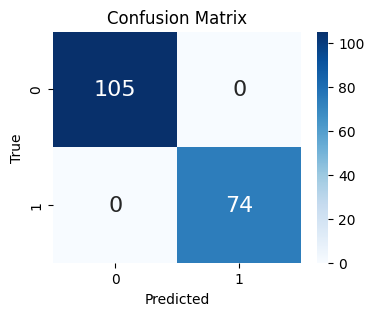

In [103]:
plt.figure(figsize=(4,3))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [104]:
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

Precision: 100.0
Recall: 100.0
F1 Score: 100.0
